# I Lecture des fichiers excel

## Première tentative de code de lecture

In [1]:
import pandas as pd
import numpy as np
from math import *
import statistics

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xlrd

In [4]:
pres_2012 = xlrd.open_workbook('participation_2012_datagouv.xls')

In [5]:
print("Nombre de feuilles: "+str(pres_2012.nsheets))
print("Nombre de feuilles: "+str(pres_2012.sheet_names()))

Nombre de feuilles: 9
Nombre de feuilles: ['France entière T1T2', 'Régions T1', 'Régions T2', 'Départements T1', 'Départements T2', 'Circo leg T1', 'Circo leg T2', 'Cantons T1', 'Cantons T2']


In [6]:
dep_t1 = pres_2012.sheet_by_name("Départements T1")

In [7]:
print("Format de la feuille 1:")
print("Nom: "+str(dep_t1.name))
print("Nombre de lignes: "+str(dep_t1.nrows))
print("Nombre de colonnes: "+str(dep_t1.ncols))

Format de la feuille 1:
Nom: Départements T1
Nombre de lignes: 108
Nombre de colonnes: 73


In [8]:
cols_dep_t1 = dep_t1.ncols
rows = dep_t1.nrows

N'aboutit pas (je n'arrive pas à me balader dans le fichier excel)

### Deuxième tentative de code de lecture moins puissant

On tire l'abstention par département pour la présidentielle de 2012 au tour 1 et au tour 2

In [9]:
presi_2012 = pd.read_excel('participation_2012_datagouv.xls')

In [10]:
xls = pd.ExcelFile('participation_2012_datagouv.xls')

In [11]:
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [12]:
depa_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")

In [13]:
depa_t2_2012.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2012.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)
depa_t2_2012.head()

,Code du département,Libellé du département,Inscrits,Abstentions_t2,% Abs/Ins_t2,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,François,131333.0,33.34,42.77,M,SARKOZY,Nicolas,175741.0,44.62,57.23
1,2,AISNE,376073,73997.0,19.68,302076.0,80.32,21056.0,5.60,6.97,...,François,147260.0,39.16,52.40,M,SARKOZY,Nicolas,133760.0,35.57,47.60
2,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,François,111615.0,43.56,56.89,M,SARKOZY,Nicolas,84593.0,33.02,43.11
3,4,ALPES DE HAUTE PROVENCE,123895,20314.0,16.40,103581.0,83.60,6639.0,5.36,6.41,...,François,49498.0,39.95,51.06,M,SARKOZY,Nicolas,47444.0,38.29,48.94
4,5,HAUTES ALPES,106875,17470.0,16.35,89405.0,83.65,6025.0,5.64,6.74,...,François,42435.0,39.71,50.89,M,SARKOZY,Nicolas,40945.0,38.31,49.11


In [14]:
df1_2012 = depa_t1_2012[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2012 = depa_t2_2012[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2012 = pd.concat([df1_2012,df2_2012], axis = 1)
depa_t1t2_2012['Année'] = 2012
depa_t1t2_2012['Abs_nat_t1'] = (depa_t1t2_2012['Abstentions_t1'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat_t2'] = (depa_t1t2_2012['Abstentions_t2'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat'] = statistics.mean([depa_t1t2_2012['Abs_nat_t1'][0], depa_t1t2_2012['Abs_nat_t2'][0]])
depa_t1t2_2012.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,65996.0,16.76,393808.0,67279.0,17.08,2012,20.518015,19.661709,20.089862
1,2,AISNE,72928.0,19.39,376068.0,73997.0,19.68,2012,20.518015,19.661709,20.089862
2,3,ALLIER,45266.0,17.66,256275.0,45079.0,17.59,2012,20.518015,19.661709,20.089862
3,4,ALPES DE HAUTE PROVENCE,21034.0,16.97,123933.0,20314.0,16.40,2012,20.518015,19.661709,20.089862
4,5,HAUTES ALPES,18246.0,17.07,106865.0,17470.0,16.35,2012,20.518015,19.661709,20.089862


On tire l'abstention de 2017 au tour 1 et au tour 2

In [15]:
pres_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls')
pres_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls')

In [16]:
xls_1 = pd.ExcelFile('participation_2017_tour1_datagouv.xls')
xls_2 = pd.ExcelFile('participation_2017_tour2_datagouv.xls')

In [17]:
print(xls_1.sheet_names)
print(xls_2.sheet_names)

['FE Metro OM Tour 1', 'Régions Tour 1', 'Départements Tour 1', 'Circo. Leg. Tour 1', 'Canton Tour 1']
['FE Metro OM Tour 2', 'Régions Tour 2', 'Départements Tour 2', 'Circo. Leg. Tour 2', 'Canton Tour 2']


In [18]:
depa_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
depa_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")
depa_t1_2017.head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Prénom.9,Voix.9,% Voix/Ins.9,% Voix/Exp.9,Sexe.10,Nom.10,Prénom.10,Voix.10,% Voix/Ins.10,% Voix/Exp.10
0,1,Ain,415886,81507,19.60,334379,80.40,6342,1.52,1.90,...,Nathalie,1842,0.44,0.57,M,CHEMINADE,Jacques,595,0.14,0.18
1,2,Aisne,375752,80183,21.34,295569,78.66,5047,1.34,1.71,...,François,2171,0.58,0.75,M,CHEMINADE,Jacques,536,0.14,0.19
2,3,Allier,253508,54275,21.41,199233,78.59,4335,1.71,2.18,...,François,1422,0.56,0.74,M,CHEMINADE,Jacques,353,0.14,0.18
3,4,Alpes-de-Haute-Provence,126578,24323,19.22,102255,80.78,1808,1.43,1.77,...,Nathalie,521,0.41,0.52,M,CHEMINADE,Jacques,205,0.16,0.21
4,5,Hautes-Alpes,109907,20821,18.94,89086,81.06,1541,1.40,1.73,...,Nathalie,411,0.37,0.47,M,CHEMINADE,Jacques,165,0.15,0.19


In [19]:
depa_t2_2017.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2017.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [20]:
df1_2017 = depa_t1_2017[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2017 = depa_t2_2017[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2017 = pd.concat([df1_2017,df2_2017], axis = 1)
depa_t1t2_2017['Année'] = 2017
depa_t1t2_2017['Abs_nat_t1'] = (depa_t1t2_2017['Abstentions_t1'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat_t2'] = (depa_t1t2_2017['Abstentions_t2'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat'] = statistics.mean([depa_t1t2_2017['Abs_nat_t1'][0], depa_t1t2_2017['Abs_nat_t2'][0]])
depa_t1t2_2017.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,Ain,81507,19.60,415886,93130,22.39,2017,22.231967,25.432557,23.832262
1,2,Aisne,80183,21.34,375752,90745,24.15,2017,22.231967,25.432557,23.832262
2,3,Allier,54275,21.41,253508,59294,23.39,2017,22.231967,25.432557,23.832262
3,4,Alpes-de-Haute-Provence,24323,19.22,126578,29255,23.13,2017,22.231967,25.432557,23.832262
4,5,Hautes-Alpes,20821,18.94,109907,24895,22.65,2017,22.231967,25.432557,23.832262


On tire l'abstention de 2007 au tour 1 et au tour 2

In [21]:
pres_2007 = pd.read_excel('participation_2007_datagouv.xls')

In [22]:
xls = pd.ExcelFile('participation_2007_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [23]:
depa_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2007.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2007.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [24]:
df1_2007 = depa_t1_2007[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2007 = depa_t2_2007[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2007 = pd.concat([df1_2007,df2_2007], axis = 1)
depa_t1t2_2007['Année'] = 2007
depa_t1t2_2007['Abs_nat_t1'] = (depa_t1t2_2007['Abstentions_t1'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat_t2'] = (depa_t1t2_2007['Abstentions_t2'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat'] = statistics.mean([depa_t1t2_2007['Abs_nat_t1'][0], depa_t1t2_2007['Abs_nat_t2'][0]])
depa_t1t2_2007.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,52040,"13,96",372899,53428,"14,33",2007,16.231464,16.033898,16.132681
1,2,AISNE,61974,"16,42",377475,60071,"15,91",2007,16.231464,16.033898,16.132681
2,3,ALLIER,38012,"14,65",259537,38826,"14,96",2007,16.231464,16.033898,16.132681
3,4,ALPES DE HAUTE PROVENCE,16143,"13,57",118936,15140,"12,73",2007,16.231464,16.033898,16.132681
4,5,HAUTES ALPES,14428,"14,01",102955,13349,"12,95",2007,16.231464,16.033898,16.132681


On tire l'abstention de 2002 au tour 1 et au tour 2

In [25]:
pres_2002 = pd.read_excel('participation_2002_datagouv.xls')
xls = pd.ExcelFile('participation_2002_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [26]:
depa_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2002.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2002.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [27]:
df1_2002 = depa_t1_2002[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2002 = depa_t2_2002[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2002 = pd.concat([df1_2002,df2_2002], axis = 1)
depa_t1t2_2002['Année'] = 2002
depa_t1t2_2002['Abs_nat_t1'] = (depa_t1t2_2002['Abstentions_t1'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat_t2'] = (depa_t1t2_2002['Abstentions_t2'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat'] = statistics.mean([depa_t1t2_2002['Abs_nat_t1'][0], depa_t1t2_2002['Abs_nat_t2'][0]])
depa_t1t2_2002.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,89002.0,26.31,338220,64394.0,19.04,2002,14.199823,10.145453,12.172638
1,2,AISNE,96157.0,26.21,366810,71788.0,19.57,2002,14.199823,10.145453,12.172638
2,3,ALLIER,67066.0,26.19,256113,48994.0,19.13,2002,14.199823,10.145453,12.172638
3,4,ALPES DE HAUTE PROVENCE,26555.0,24.38,108943,18812.0,17.27,2002,14.199823,10.145453,12.172638
4,5,HAUTES ALPES,23051.0,24.24,95100,16533.0,17.39,2002,14.199823,10.145453,12.172638


On concatène les 4 datasets 

In [97]:
dep_abs = pd.concat([depa_t1t2_2017, depa_t1t2_2012, depa_t1t2_2007, depa_t1t2_2002], axis = 0)
dep_abs.sort_values(by = 'Année', ascending = False, inplace = True)
dep_abs.reset_index(inplace = True)
dep_abs.drop('index', axis = 1, inplace = True)
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,Ain,81507.0,19.6,415886.0,93130.0,22.39,2017,22.231967,25.432557,23.832262
1,68,Haut-Rhin,110496.0,21.0,526190.0,128800.0,24.48,2017,22.231967,25.432557,23.832262
2,79,Deux-Sèvres,51156.0,18.78,272385.0,57585.0,21.14,2017,22.231967,25.432557,23.832262
3,78,Yvelines,177485.0,18.66,951148.0,225177.0,23.68,2017,22.231967,25.432557,23.832262
4,77,Seine-et-Marne,183302.0,20.79,881558.0,228009.0,25.88,2017,22.231967,25.432557,23.832262


In [98]:
dep_abs['% Abs/Ins_t1'].unique()

array([19.6, 21.0, 18.78, 18.66, 20.79, 20.11, 16.15, 21.53, 20.23, 18.15,
       21.35, 19.52, 21.55, 20.1, 21.51, 21.27, 19.29, 19.38, 20.25,
       21.48, 18.37, 20.15, 23.11, 22.24, 23.63, 16.66, 17.34, 17.79,
       21.28, 20.03, 21.34, 55.72, 67.76, 36.07, 45.07, 61.06, 51.86,
       56.43, 41.32, 65.65, 60.12, 59.96, 22.94, 20.89, 27.51, 17.91,
       19.8, 22.71, 21.8, 19.95, 19.01, 20.24, 16.11, 19.68, 16.37, 19.39,
       20.68, 18.32, 21.39, 15.71, 19.04, 32.76, 31.03, 18.51, 22.23,
       20.22, 21.15, 18.02, 19.23, 21.87, 16.67, 19.27, 19.11, 18.22,
       22.68, 18.7, 21.25, 18.94, 19.22, 21.45, 19.81, 21.41, 20.06,
       17.86, 21.29, 18.52, 17.04, 16.72, 19.43, 16.39, 18.56, 21.31,
       18.88, 19.44, 19.19, 19.93, 19.94, 18.84, 15.89, 17.47, 19.91,
       15.98, 20.49, 18.69, 20.6, 16.1, 21.18, 22.09, 19.09, 19.85, 18.89,
       16.91, 17.83, 18.92, 16.84, 18.42, 15.49, 20.17, 18.2, 16.77,
       17.75, 15.93, 20.13, 16.65, 19.07, 22.12, 19.24, 21.85, 14.73,
       2

In [99]:
dep_abs['% Abs/Ins_t1'].head()

0     19.6
1     21.0
2    18.78
3    18.66
4    20.79
Name: % Abs/Ins_t1, dtype: object

In [100]:
stripped_virgule_t1 = dep_abs['% Abs/Ins_t1'].astype('str')
stripped_virgule_t1 = stripped_virgule_t1.str.replace(',','.')
dep_abs['% Abs/Ins_t1'] = stripped_virgule_t1.astype('float')

In [101]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     426 non-null    object 
 1   Libellé du département  426 non-null    object 
 2   Abstentions_t1          426 non-null    float64
 3   % Abs/Ins_t1            426 non-null    float64
 4   Inscrits                427 non-null    float64
 5   Abstentions_t2          426 non-null    float64
 6   % Abs/Ins_t2            426 non-null    object 
 7   Année                   428 non-null    int64  
 8   Abs_nat_t1              428 non-null    float64
 9   Abs_nat_t2              428 non-null    float64
 10  Abs_nat                 428 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 36.9+ KB


In [102]:
stripped_virgule_t2 = dep_abs['% Abs/Ins_t2'].astype('str')
stripped_virgule_t2 = stripped_virgule_t2.str.replace(',','.')
dep_abs['% Abs/Ins_t2'] = stripped_virgule_t2.astype('float')

In [103]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     426 non-null    object 
 1   Libellé du département  426 non-null    object 
 2   Abstentions_t1          426 non-null    float64
 3   % Abs/Ins_t1            426 non-null    float64
 4   Inscrits                427 non-null    float64
 5   Abstentions_t2          426 non-null    float64
 6   % Abs/Ins_t2            426 non-null    float64
 7   Année                   428 non-null    int64  
 8   Abs_nat_t1              428 non-null    float64
 9   Abs_nat_t2              428 non-null    float64
 10  Abs_nat                 428 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 36.9+ KB


In [104]:
dep_abs['% Abs/Ins'] = dep_abs[['% Abs/Ins_t1', '% Abs/Ins_t2']].mean(axis = 1)

In [105]:
dep_abs.loc[426]

Code du département                 28
Libellé du département    EURE ET LOIR
Abstentions_t1                 72820.0
% Abs/Ins_t1                     26.18
Inscrits                      278123.0
Abstentions_t2                 53703.0
% Abs/Ins_t2                     19.32
Année                             2002
Abs_nat_t1                   14.199823
Abs_nat_t2                   10.145453
Abs_nat                      12.172638
% Abs/Ins                        22.75
Name: 426, dtype: object

In [106]:
dep_abs.drop(160, inplace = True)

In [107]:
dep_abs.drop(427, inplace = True)

In [108]:
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat,% Abs/Ins
0,1,Ain,81507.0,19.60,415886.0,93130.0,22.39,2017,22.231967,25.432557,23.832262,20.995
1,68,Haut-Rhin,110496.0,21.00,526190.0,128800.0,24.48,2017,22.231967,25.432557,23.832262,22.740
2,79,Deux-Sèvres,51156.0,18.78,272385.0,57585.0,21.14,2017,22.231967,25.432557,23.832262,19.960
3,78,Yvelines,177485.0,18.66,951148.0,225177.0,23.68,2017,22.231967,25.432557,23.832262,21.170
4,77,Seine-et-Marne,183302.0,20.79,881558.0,228009.0,25.88,2017,22.231967,25.432557,23.832262,23.335


In [109]:
max(dep_abs['% Abs/Ins'])

66.21000000000001

In [110]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 426
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     426 non-null    object 
 1   Libellé du département  426 non-null    object 
 2   Abstentions_t1          426 non-null    float64
 3   % Abs/Ins_t1            426 non-null    float64
 4   Inscrits                426 non-null    float64
 5   Abstentions_t2          426 non-null    float64
 6   % Abs/Ins_t2            426 non-null    float64
 7   Année                   426 non-null    int64  
 8   Abs_nat_t1              426 non-null    float64
 9   Abs_nat_t2              426 non-null    float64
 10  Abs_nat                 426 non-null    float64
 11  % Abs/Ins               426 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 43.3+ KB


A faire pour la suite :
- créer graphique introductif abstention national sur 5 ans (reste stable, comment l'augmenter ?)
- créer carte introductive abstention territorial (les départements ne votent pas du tout autant. Conséquence --> l'île de France a un poids plus élevé que la Lozère dans l'éléction de leur dirigeant. Comment y remédier ?)

# II Première visualisation

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

Abstention nationale par année depuis 2002

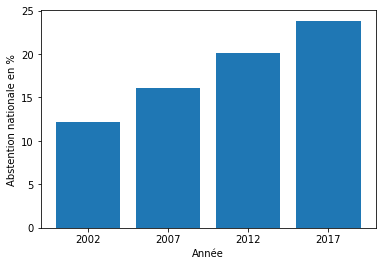

In [43]:
Année = ['2002', '2007', '2012', '2017']
val_2002 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2002].index[0]]
val_2007 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2007].index[0]]
val_2012 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2012].index[0]]
val_2017 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2017].index[0]]
Abstention = [val_2002, val_2007, val_2012, val_2017]
plt.bar(Année, Abstention)
plt.ylabel('Abstention nationale en %')
plt.xlabel('Année')
plt.show()

Abstention par département en 2017

Text(0.5, 1.0, 'Abstentions / dep 2017')

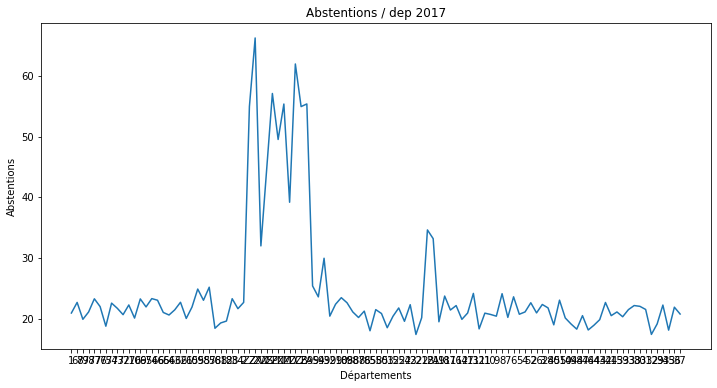

In [44]:
Départements = []
for dep in dep_abs['Code du département'][dep_abs['Année'] == 2017]:
    Départements.append(dep)
Abstentions = []
for ab in dep_abs['% Abs/Ins'][dep_abs['Année'] == 2017]:
    Abstentions.append(ab)

fig, axes = plt.subplots(figsize=(12,6))

axes.plot(Départements, Abstentions)
axes.set_xlabel('Départements')
axes.set_ylabel('Abstentions')
axes.set_title('Abstentions / dep 2017')

In [45]:
len(Départements)

107

In [46]:
dep_abs['Code du département'][dep_abs['Année'] == 2017]

0       1
1      68
2      79
3      78
4      77
       ..
102    29
103    34
104    35
105    36
106    37
Name: Code du département, Length: 107, dtype: object

In [142]:
# Pb de départements il y en a trop, même si on garde les DOM y en a 11 alors qu'en réalité y en a genre 4.

Insérer ici les graphiques géographiques que vous avez vu en cours (vous serez plus rapide que moi)

# III Agrégation des données de tendances de votes par département
(Héléna)

In [47]:
trend_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")

In [48]:
trend_t2_2012.head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,François,131333.0,33.34,42.77,M,SARKOZY,Nicolas,175741.0,44.62,57.23
1,2,AISNE,376073,73997.0,19.68,302076.0,80.32,21056.0,5.60,6.97,...,François,147260.0,39.16,52.40,M,SARKOZY,Nicolas,133760.0,35.57,47.60
2,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,François,111615.0,43.56,56.89,M,SARKOZY,Nicolas,84593.0,33.02,43.11
3,4,ALPES DE HAUTE PROVENCE,123895,20314.0,16.40,103581.0,83.60,6639.0,5.36,6.41,...,François,49498.0,39.95,51.06,M,SARKOZY,Nicolas,47444.0,38.29,48.94
4,5,HAUTES ALPES,106875,17470.0,16.35,89405.0,83.65,6025.0,5.64,6.74,...,François,42435.0,39.71,50.89,M,SARKOZY,Nicolas,40945.0,38.31,49.11


In [49]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std())

In [51]:
trend_t2_2012 = trend_t2_2012[['Code du département', 'Libellé du département', 'Nom', '% Voix/Exp', 'Nom.1', '% Voix/Exp.1']]
trend_t2_2012['Gauche'] = trend_t2_2012['% Voix/Exp']
trend_t2_2012['Droite'] = trend_t2_2012['% Voix/Exp.1']
trend_t2_2012['trend'] = 0.01*trend_t2_2012['Droite'] + 0.01*trend_t2_2012['Gauche']*(-1)
trend_t2_2012.head()

,Code du département,Libellé du département,Nom,% Voix/Exp,Nom.1,% Voix/Exp.1,Gauche,Droite,trend
0,1,AIN,HOLLANDE,42.77,SARKOZY,57.23,42.77,57.23,0.1446
1,2,AISNE,HOLLANDE,52.40,SARKOZY,47.60,52.40,47.60,-0.0480
2,3,ALLIER,HOLLANDE,56.89,SARKOZY,43.11,56.89,43.11,-0.1378
3,4,ALPES DE HAUTE PROVENCE,HOLLANDE,51.06,SARKOZY,48.94,51.06,48.94,-0.0212
4,5,HAUTES ALPES,HOLLANDE,50.89,SARKOZY,49.11,50.89,49.11,-0.0178


# IV Ajout de certaines features socio-économiques

Création d'un dataframe pour la pop active

In [130]:
pop_active_dep = pd.read_excel('pop_active_dep.xls')
xls_1 = pd.ExcelFile('pop_active_dep.xls')
print(xls_1.sheet_names)

['Présentation', 'Documentation', 'Modifications_territoriales', 'DEP_1968', 'Feuil1', 'DEP_1975', 'DEP_1982', 'DEP_1990', 'DEP_1999', 'DEP_2007', 'DEP_2012', 'DEP_2017', 'COM_1968', 'COM_1975', 'COM_1982', 'COM_1990', 'COM_1999', 'COM_2007', 'COM_2012', 'COM_2017']


In [131]:
pop_active_dep_2017 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2017")
pop_active_dep_2012 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2012")
pop_active_dep_2007 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2007")

Création d'un dataframe pour la population par grande classe d'âge (très important)

In [140]:
age_pop_dep = pd.read_excel('age_pop_dep.xlsx')
xls_1 = pd.ExcelFile('age_pop_dep.xlsx')
print(xls_1.sheet_names)

['À savoir', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', 'Feuil1', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975']


In [141]:
age_pop_dep_2017 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2017")
age_pop_dep_2012 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2012")
age_pop_dep_2007 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2007")
age_pop_dep_2002 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2002")
age_pop_dep_2002.head()
# galère faudrait réussir à faire un multi index

,Départements,Unnamed: 1,Ensemble,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Hommes,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Femmes,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total
1,01,Ain,146640,145248,146194,62718,34816,535616,75084,73352,73898,30174,12797,265305,71556,71896,72296,32544,22019,270311
2,02,Aisne,145835,138617,143369,69349,39614,536784,74255,69835,72156,31407,14189,261842,71580,68782,71213,37942,25425,274942
3,03,Allier,72876,80217,94450,58224,38588,344355,37362,40573,46755,26366,14279,165335,35514,39644,47695,31858,24309,179020
4,04,Alpes-de-Haute-Provence,34434,33536,40312,23687,13781,145750,17741,16584,20105,11364,5309,71103,16693,16952,20207,12323,8472,74647


Création d'un dataframe sur les résultats par bureau de vote dans chaque département

In [146]:
bv_t1t2_2002 = pd.read_csv('bv_t1t2_2002', delimiter = ';')
bv_t1t2_2007 = pd.read_csv('bv_t1t2_2007', delimiter = ';')
bv_t1t2_2012 = pd.read_csv('bv_t1t2_2012', delimiter = ';')
bv_t1t2_2007.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Tour,Coded�partement,Codecommune,"Nomdelacommune,N�bureaudevote",Inscrits,Votants,Exprim�s,N�deputducandidat,Nomcandidat,Pr�nomcandidat,Codesiglecandidat,Nombredevoixcandidat
1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,5,BOV�,Jos�,BOVE,5
1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,2,BUFFET,Marie-George,BUFF,3
1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,3,SCHIVARDI,G�rard,SCHI,1
1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,11,LAGUILLER,Arlette,LAGU,6
1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,7,de VILLIERS,Philippe,VILL,20


In [153]:
bv_t1_2017 = pd.read_csv('bv_t1_2017', delimiter = ';')
bv_t2_2017 = pd.read_csv('bv_t2_2017', delimiter = ';')
bv_t1_2017.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,01,Ain,04,4�me circonscription,001,L'Abergement-Cl�menciat,0001,598,92,"15,38",...,6.1,"1,00","1,21",11,M.8,FILLON,Fran�ois.1,110,"18,39","22,22"
0,1,Ain,5,5�me circonscription,2,L'Abergement-de-Varey,1.0,209,25,"11,96",...,1,"0,48","0,57",11,M,FILLON,Fran�ois,34,"16,27","19,32"
1,1,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,1.0,1116,233,"20,88",...,7,"0,63","0,81",11,M,FILLON,Fran�ois,116,"10,39","13,49"
2,1,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,2.0,1128,256,"22,70",...,11,"0,98","1,29",11,M,FILLON,Fran�ois,124,"10,99","14,59"
3,1,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,3.0,1116,227,"20,34",...,7,"0,63","0,80",11,M,FILLON,Fran�ois,149,"13,35","17,05"
4,1,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,4.0,1007,220,"21,85",...,9,"0,89","1,17",11,M,FILLON,Fran�ois,124,"12,31","16,15"
